In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
img_dir = '../images/'
data_dir = '../ml_data/'

# 機器人手臂範圍

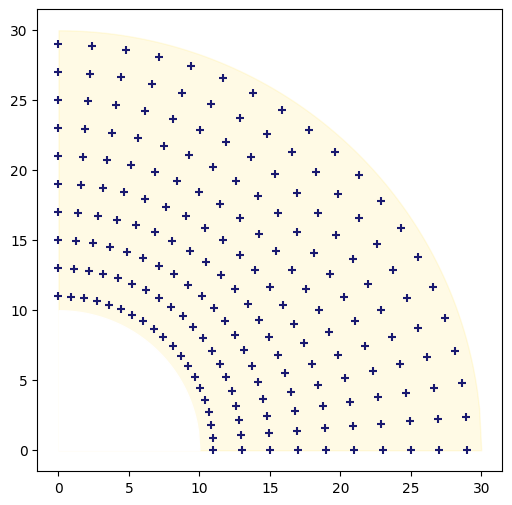

In [3]:
# Preaper training data (input)
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)

x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))  # 將L cos(T)弄成一豎一橫的向量
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))  # 矩陣乘法＠

plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')  # 拉直 才能畫出來
plt.savefig(img_dir + "robot_area.pdf", format='pdf')
plt.show()

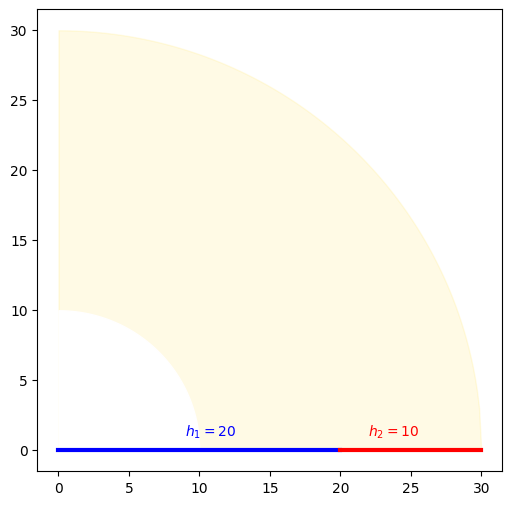

In [10]:
# Preaper training data (input)
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))  # 將L cos(T)弄成一豎一橫的向量
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))  # 矩陣乘法＠
plt.plot([0, 20], [0, 0], linewidth=3, color='blue', linestyle='-')
plt.plot([20, 30], [0, 0], linewidth=3, color='red', linestyle='-')
ax = plt.gca()
ax.text(9, 1, '$h_1=20$',color='blue')
ax.text(22, 1, '$h_2=10$',color='red')
#plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')  # 拉直 才能畫出來
# plt.savefig(img_dir + "robot_area2.pdf", format='pdf')
plt.show()

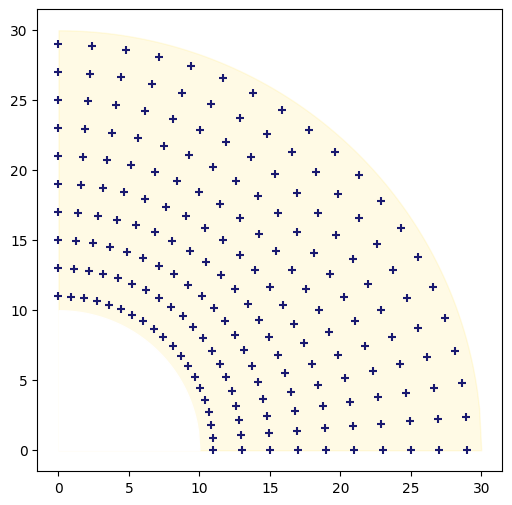

In [11]:
# Preaper training data (input)
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))  # 將L cos(T)弄成一豎一橫的向量
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))  # 矩陣乘法＠

plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')  # 拉直 才能畫出來
# plt.savefig(img_dir + "robot_area_dot.pdf", format='pdf')
plt.show()

# sklearn neural_network.MLPRegressor

## IBFGS Logistic

Root Mean square error is 0.0609


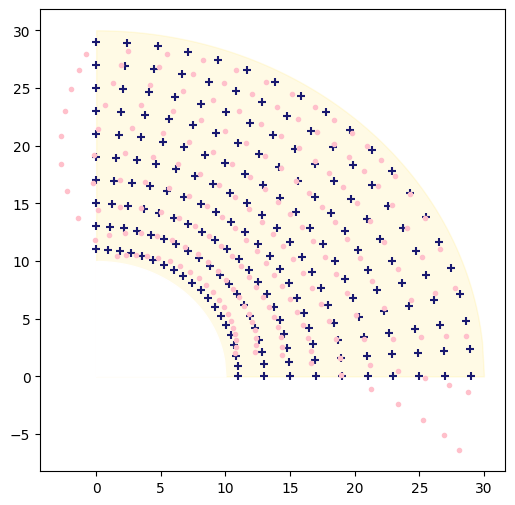

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (10, )#隱藏層數量
solver = 'lbfgs' # the best for robot data 最常用的
# solver = ’sgd’ (針對類別)
# solver = ’adam’

# Multi-Layer Perceptron Regressor
# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = False, activation = 'logistic',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.scatter(x_hat,y_hat,marker='.',color='pink')
# plt.savefig(img_dir + "ib+lo_10.pdf", format='pdf')

# adam+Logistic

Iteration 1, loss = 1.31645957
Iteration 2, loss = 1.24005811
Iteration 3, loss = 1.16666089
Iteration 4, loss = 1.09628959
Iteration 5, loss = 1.02892783
Iteration 6, loss = 0.96453922
Iteration 7, loss = 0.90308125
Iteration 8, loss = 0.84451126
Iteration 9, loss = 0.78879308
Iteration 10, loss = 0.73589909
Iteration 11, loss = 0.68580774
Iteration 12, loss = 0.63849922
Iteration 13, loss = 0.59395142
Iteration 14, loss = 0.55213661
Iteration 15, loss = 0.51301912
Iteration 16, loss = 0.47655388
Iteration 17, loss = 0.44268559
Iteration 18, loss = 0.41134853
Iteration 19, loss = 0.38246700
Iteration 20, loss = 0.35595613
Iteration 21, loss = 0.33172317
Iteration 22, loss = 0.30966895
Iteration 23, loss = 0.28968942
Iteration 24, loss = 0.27167701
Iteration 25, loss = 0.25552175
Iteration 26, loss = 0.24111199
Iteration 27, loss = 0.22833488
Iteration 28, loss = 0.21707662
Iteration 29, loss = 0.20722266
Iteration 30, loss = 0.19865804
Iteration 31, loss = 0.19126790
Iteration 32, los

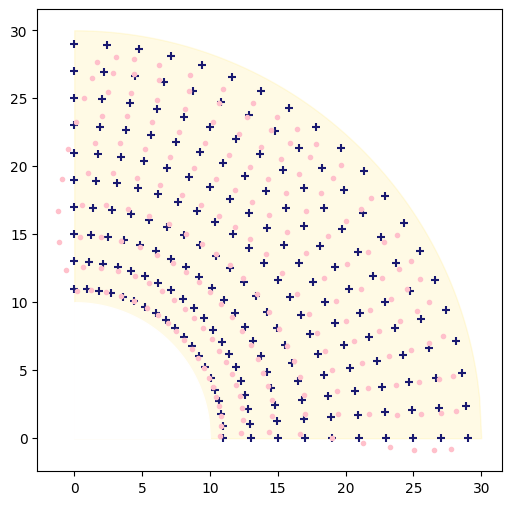

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (80, )#隱藏層數量
solver = 'lbfgs' # the best for robot data 最常用的
#solver = 'sgd' (針對類別)
solver = 'adam'

# Multi-Layer Perceptron Regressor
# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = True, activation = 'logistic',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.scatter(x_hat,y_hat,marker='.',color='pink')
# plt.savefig(img_dir + "ad+lo_80.pdf", format='pdf')

# IBFGS+Relu

Root Mean square error is 0.0464


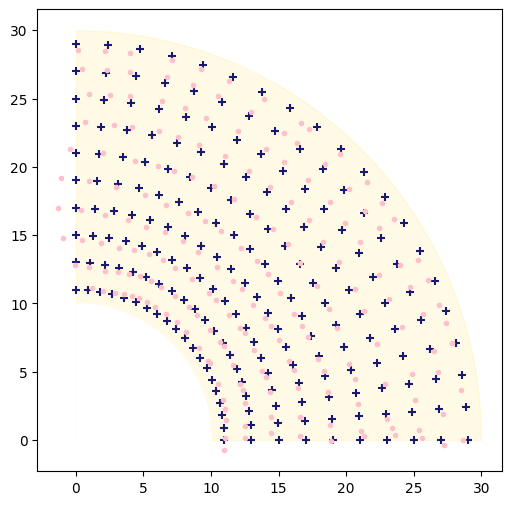

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (80, )#隱藏層數量
solver = 'lbfgs' # the best for robot data 最常用的
# solver = ’sgd’ (針對類別)
# solver = ’adam’

# Multi-Layer Perceptron Regressor
# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = False, activation = 'relu',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.scatter(x_hat,y_hat,marker='.',color='pink')
# plt.savefig(img_dir + "ib+re_80.pdf", format='pdf')

# adam+relu

Root Mean square error is 0.0905


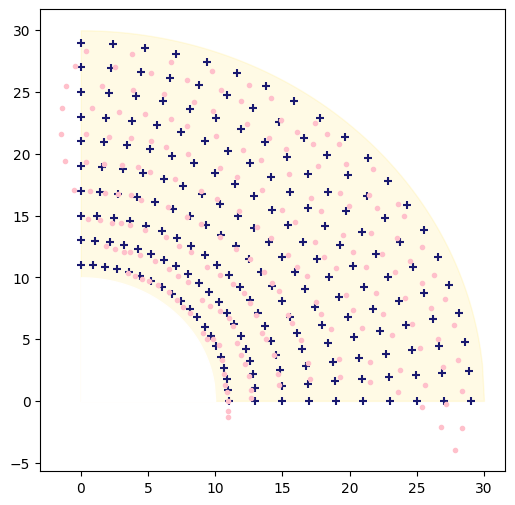

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)


x = np.linspace(0, l1+l2, 200)
plt.figure(figsize=(6, 6))
plt.fill_between(x, f1(x), 0, color='#FFD700', alpha=0.1)#畫圖底色
x = np.linspace(0, l2, 100)
plt.fill_between(x, f2(x), 0, color='white')

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) -  np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] #200*2 座標
OutputY = np.c_[theta1, theta2] #200*2 theta
hidden_layers = (80, )#隱藏層數量
# solver = 'lbfgs' # the best for robot data 最常用的
# solver = ’sgd’ (針對類別)
solver = 'adam'

# Multi-Layer Perceptron Regressor
# default activation = ’relu’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, 
verbose = False, activation = 'relu',  tol=1e-6, random_state = 0) #max_iter最大次數
#activation激發函數
#verbose印出來

mlp_reg.fit(InputX, OutputY) # Training ...
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat) 
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.scatter(x_hat,y_hat,marker='.',color='pink')
# plt.savefig(img_dir + "ad+re_80.pdf", format='pdf')

# 訓練資料生成

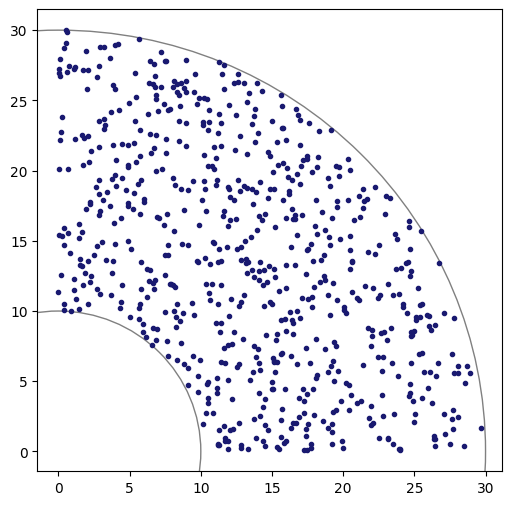

In [22]:
import numpy as np
from scipy.stats import uniform
from scipy.special import gammainc

radius_in, radius_out =10, 30
center = np.array([0, 0])
X = uniform.rvs(loc = 0, scale = radius_out, size=(1000, 2),random_state=222) 
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
# Idx = (d < radius_out) & (d > radius_in)#只要範圍內
TrainData = X[(d < radius_out) & (d > radius_in), :]#只要第一象限
fig =plt.figure(figsize=(6,6))
ax = fig.gca()
ax.add_artist(plt.Circle(center,radius_out,fill=False,color='0.5'))
ax.add_artist(plt.Circle(center,radius_in,fill=False,color='0.5'))
plt.scatter(TrainData [:,0],TrainData [:,1],marker='.',color='midnightblue') #可當下一段的訓練資料
# plt.savefig(img_dir + "robot_data_average.pdf", format='pdf')
plt.show()

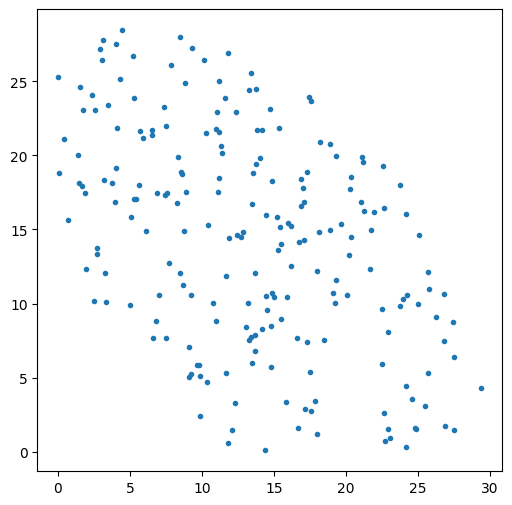

In [37]:
import numpy as np
from scipy.special import gammainc


def randsphere(center, radius, n_per_sphere):
    # generate random numbers in a n−dimensional sphere i.e. in 2D, it is in a circle; in 3D, it is in a ball
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p


l1, l2 = 20, 10
p = randsphere(np.array([0, 0]), l1+l2, 1000)

# #扇形範圍內的資料
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]  # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= 10**2, :]  # 扇形內
plt.figure(figsize=(6, 6))
plt.scatter(p[:, 0], p[:, 1], marker='.')  # 可當下一段的訓練資料
# plt.savefig(img_dir + "circle_data.pdf", format='pdf')
plt.show()


# MLPRegressor表現

Root Mean square error is 0.0705


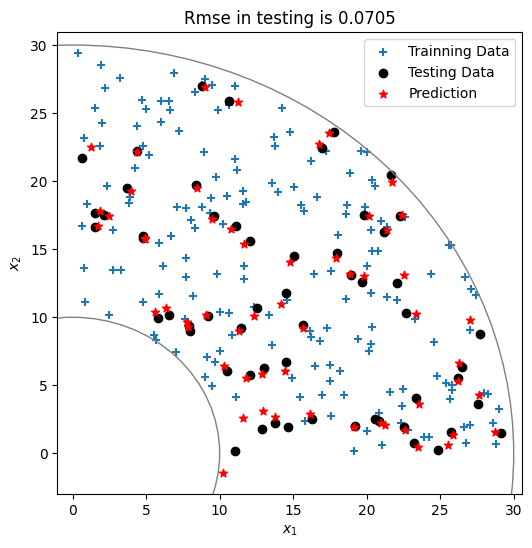

In [56]:
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
n = 1000
center = np.array([0, 0])
radius_in, radius_out = 10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :]
x1, x2 = p[:, 0], p[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
hidden_layers = (40, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’

mlp_reg.fit(InputX, OutputY)  # Training ...
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = mlp_reg.predict(InputX_test)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
rmse = np.sqrt(mean_squared_error(OutputY_test, OutputY_hat_test))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Rmse in testing is {:.4f}'.format(rmse))
# plt.savefig(img_dir + "mlpreg.pdf", format='pdf')


# NL學習器表現

Trainer(TrainBFGS)
Epoch: 100; Error: 0.1541619840713659;
Epoch: 200; Error: 0.08601473998437412;
Epoch: 300; Error: 0.07638723608882715;
Epoch: 400; Error: 0.0680856409099646;
Epoch: 500; Error: 0.06334477474174674;
Epoch: 600; Error: 0.06118622716851811;
Epoch: 700; Error: 0.060635630118025585;
Epoch: 800; Error: 0.06010832292078762;
Epoch: 900; Error: 0.052757231554632175;
Epoch: 1000; Error: 0.0510137902962788;
Epoch: 1100; Error: 0.044991067751770086;
Epoch: 1200; Error: 0.043104336483904826;
Epoch: 1300; Error: 0.03775990531866267;
Epoch: 1400; Error: 0.033642451992434916;
Epoch: 1500; Error: 0.02900339194291189;
Epoch: 1600; Error: 0.028010958701221438;
Epoch: 1700; Error: 0.027491192655430426;
Epoch: 1800; Error: 0.027112926568115685;
Epoch: 1900; Error: 0.02685257161626338;
Epoch: 2000; Error: 0.026616514161993017;
Epoch: 2100; Error: 0.026572632750699092;
Epoch: 2200; Error: 0.026301039811947317;
Epoch: 2300; Error: 0.02603798979848609;
Epoch: 2400; Error: 0.02575687374477736

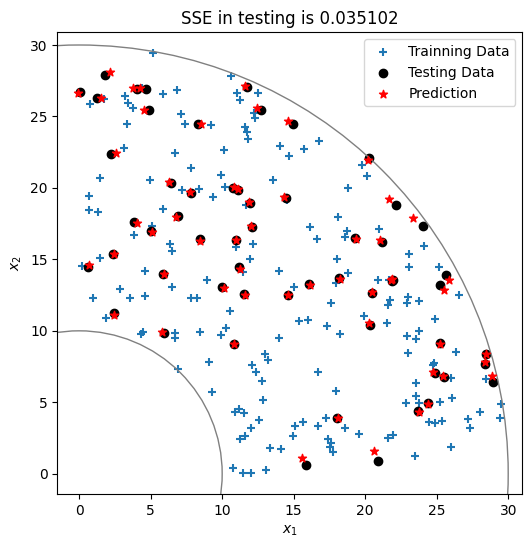

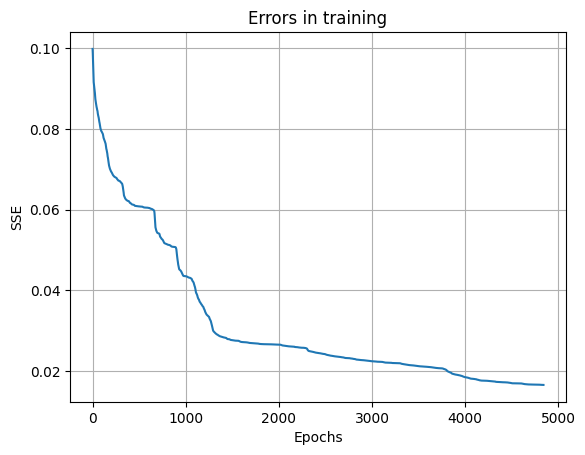

In [65]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
n = 1000
center = np.array([0, 0])
radius_in, radius_out = 10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :]
x1, x2 = p[:, 0], p[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
# create network
hidden_output_layers = [20, 2]  # hidden layers + output layer
# activation functions for each layer and output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()]
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],
                   size=hidden_output_layers, transf=transf)
# change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs  # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf)  # show the training function
err = net.train(InputX, OutputY, epochs=5000, show=100,
                goal=0.01)  # show := print period, the return is an error function
# predicted output for training data
OutputY_hat = net.sim(InputX)
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 *
                                              np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.pdf", format='pdf')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.pdf", format='pdf')
plt.show()


# 手寫數字辨識 蒙太奇圖陣

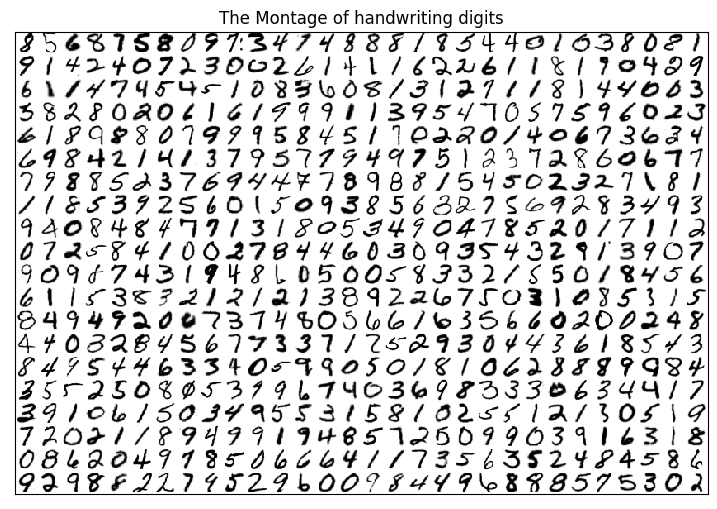

In [208]:
from scipy.io import loadmat
data_dir = '../ml_data/digits_train/'
D = loadmat(data_dir + 'Digits_train.mat')  # D.keys()
X = D['X']  # images
y = D['y']  # labels: single output in 0~9
plt.figure(figsize=(9, 6))
# prepare and diaplay a montage of digit images
n, m = 20, 30  # Anxmmontage(totalmnimages)
sz = np.sqrt(X.shape[1]).astype('int')  # image size sz x sz
M = np.zeros((m*sz, n*sz))  # montage image
A = X[:m*n,:]  # show the first nm images
# Arrange images to form a montage
for i in range(m):#把一列一列的圖片資訊，reshape成圖 一個一個排
    for j in range(n):
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[i*n+j, :].reshape(sz, sz)
plt.imshow(M.T, cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
# plt.savefig(img_dir + "montage_number.pdf", format='pdf')
plt.show()

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

N = 1000
X_ = np.array(X)[:N, :]
y_ = np.array(y)[:N, :]
# prepare data
X_train, X_test, y_train, y_test = train_test_split(
    X_/255, y_.ravel(), test_size=0.25)
# setup and run
hidden_layers = (30,)  # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam'  # default solver
clf = MLPClassifier(max_iter=10000, solver=solver,
                    hidden_layer_sizes=hidden_layers, verbose=True, activation='logistic', tol=1e-6, random_state=0)
# default activation = ’relu’ tol=10^-6 training loss 10次變化小於此數為終點 #verbose跑出過程
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)


Iteration 1, loss = 2.31736714
Iteration 2, loss = 2.23814343
Iteration 3, loss = 2.17277333
Iteration 4, loss = 2.11012537
Iteration 5, loss = 2.05280402
Iteration 6, loss = 1.99723755
Iteration 7, loss = 1.94491483
Iteration 8, loss = 1.89470918
Iteration 9, loss = 1.84726388
Iteration 10, loss = 1.80254675
Iteration 11, loss = 1.75899125
Iteration 12, loss = 1.71735756
Iteration 13, loss = 1.67742086
Iteration 14, loss = 1.63860772
Iteration 15, loss = 1.60085547
Iteration 16, loss = 1.56483107
Iteration 17, loss = 1.52910150
Iteration 18, loss = 1.49521277
Iteration 19, loss = 1.46156972
Iteration 20, loss = 1.42841265
Iteration 21, loss = 1.39681675
Iteration 22, loss = 1.36570916
Iteration 23, loss = 1.33498277
Iteration 24, loss = 1.30577030
Iteration 25, loss = 1.27687575
Iteration 26, loss = 1.24846236
Iteration 27, loss = 1.22094870
Iteration 28, loss = 1.19391455
Iteration 29, loss = 1.16764985
Iteration 30, loss = 1.14215403
Iteration 31, loss = 1.11717883
Iteration 32, los

# 混淆矩陣

Testing score:0.900000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Testing score 0.900000')

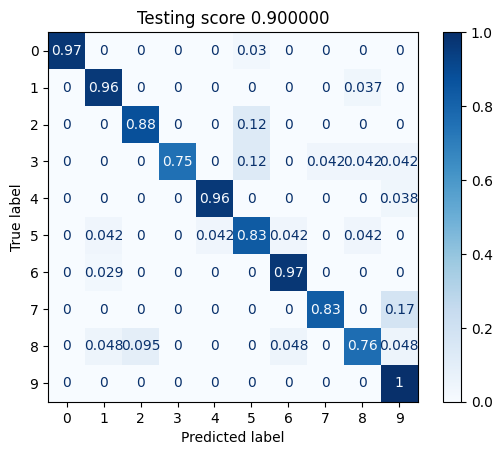

In [43]:
from sklearn.metrics import plot_confusion_matrix
score = clf.score(X_test, y_test)
# Confusion matrix
print("Testing score:{:.6f}".format(score))
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Testing score {:.6f}'.format(score))
# plt.savefig(img_dir + "confusionmatrix_number.pdf", format='pdf')

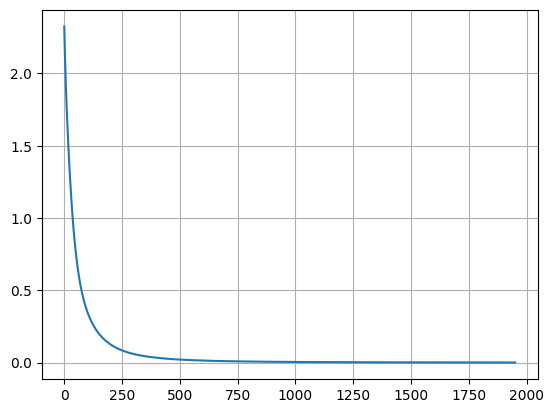

In [47]:
plt.plot(clf.loss_curve_)
plt.grid()
#plt.savefig(img_dir + "losscurve_number.pdf", format='pdf')

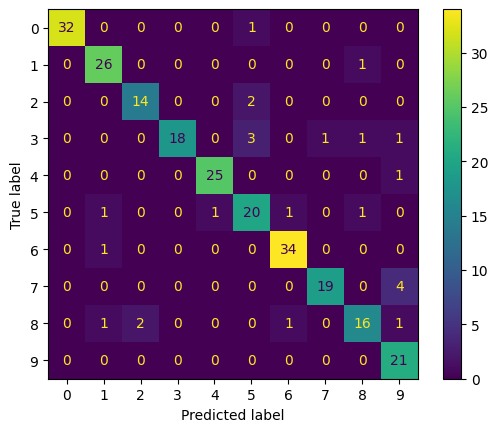

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# 資料評比一 樣本少 不均勻

Text(0, 0.5, '$x_2$')

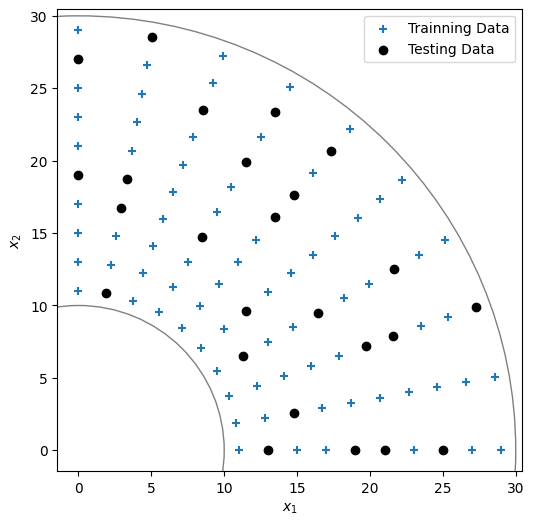

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
center = np.array([0, 0])
radius_in, radius_out = 10, 30
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)

t = np.linspace(0, np.pi/2, 10)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
# plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
x1, x2 = X.ravel(), Y.ravel()
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# plt.savefig(img_dir + "datalow_nouniform.pdf", format='pdf')

Root Mean square error is 0.0294


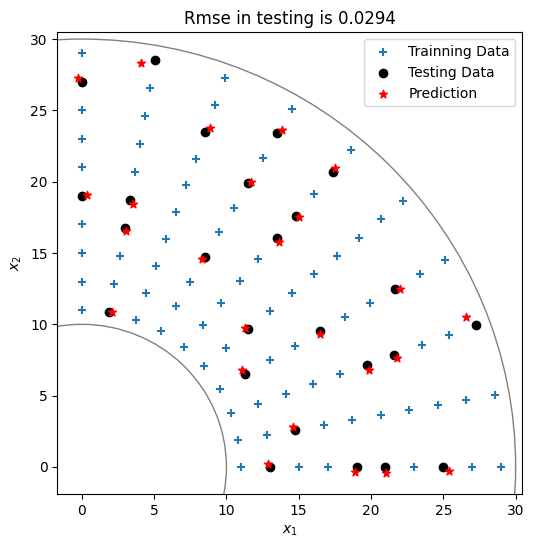

In [64]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
hidden_layers = (80, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’
mlp_reg.fit(InputX, OutputY)  # Training ...
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = mlp_reg.predict(InputX_test)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
rmse = np.sqrt(mean_squared_error(OutputY_test, OutputY_hat_test))
print('Root Mean square error is {:.4f}'.format(rmse))

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Rmse in testing is {:.4f}'.format(rmse))
# plt.savefig(img_dir + "datalow_nouniform80.pdf", format='pdf')

# 資料評比二 資料多 不均勻

Text(0, 0.5, '$x_2$')

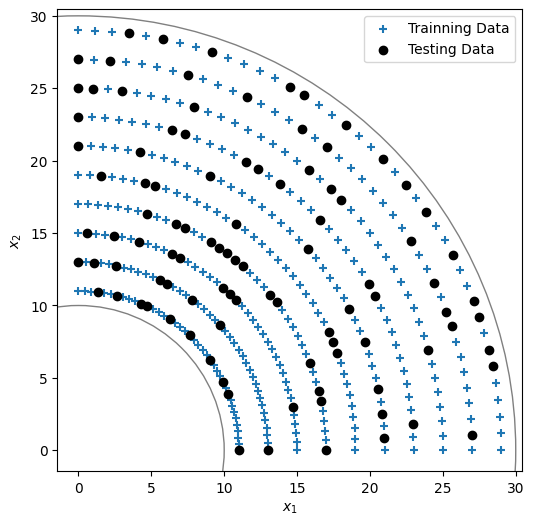

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
l1, l2 = 20, 10
def f1(x): return np.sqrt((l1+l2)**2-x**2)
def f2(x): return np.sqrt(l2**2-x**2)

t = np.linspace(0, np.pi/2, 40)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))
# plt.scatter(X.ravel(), Y.ravel(), marker='+', color='midnightblue')
x1, x2 = X.ravel(), Y.ravel()
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.savefig(img_dir + "datahigh_nouniform.pdf", format='pdf')

Root Mean square error is 0.0204


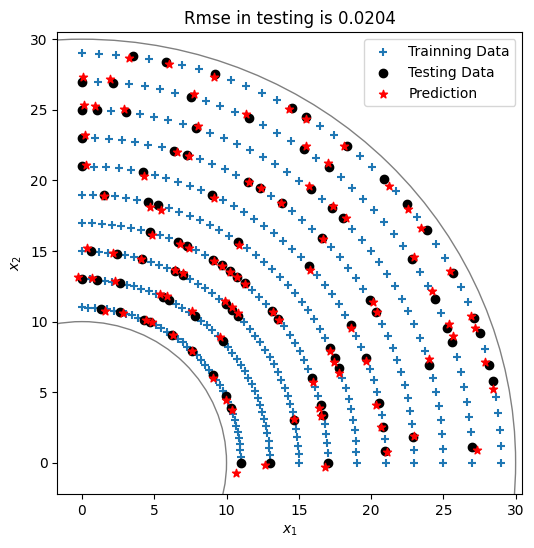

In [35]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
hidden_layers = (80, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’
mlp_reg.fit(InputX, OutputY)  # Training ...
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = mlp_reg.predict(InputX_test)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
rmse = np.sqrt(mean_squared_error(OutputY_test, OutputY_hat_test))
print('Root Mean square error is {:.4f}'.format(rmse))

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Rmse in testing is {:.4f}'.format(rmse))
# plt.savefig(img_dir + "datahigh_nouniform80.pdf", format='pdf')

# 資料評比三 資料少 均勻

Text(0, 0.5, '$x_2$')

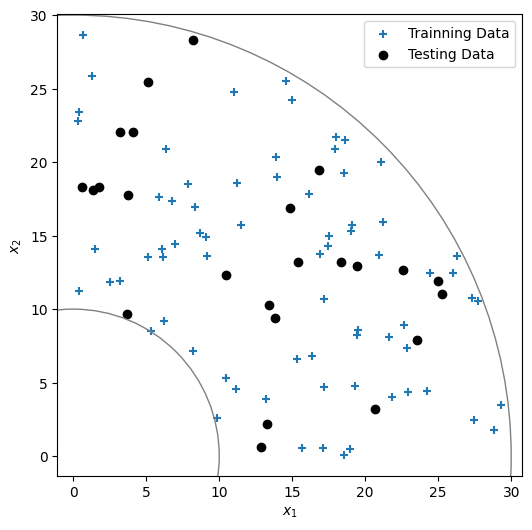

In [44]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
n = 450
center = np.array([0, 0])
radius_in, radius_out = 10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :]
x1, x2 = p[:, 0], p[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# plt.savefig(img_dir + "datalow_uniform.pdf", format='pdf')



Root Mean square error is 0.0736


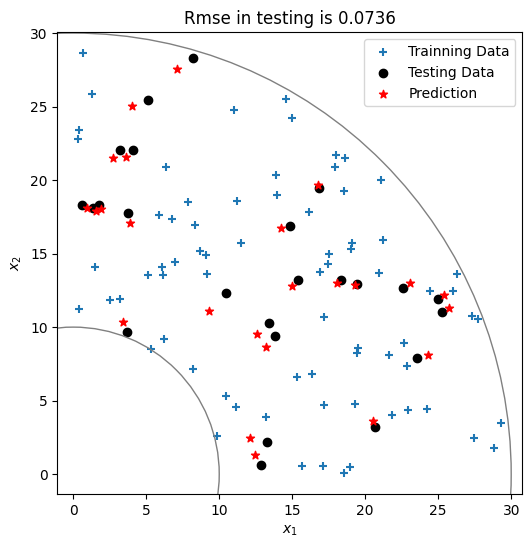

In [45]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
hidden_layers = (80, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’
mlp_reg.fit(InputX, OutputY)  # Training ...
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = mlp_reg.predict(InputX_test)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
rmse = np.sqrt(mean_squared_error(OutputY_test, OutputY_hat_test))
print('Root Mean square error is {:.4f}'.format(rmse))

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Rmse in testing is {:.4f}'.format(rmse))
plt.savefig(img_dir + "datalow_uniform80.pdf", format='pdf')

# 資料評比四 資料多 均勻

Text(0, 0.5, '$x_2$')

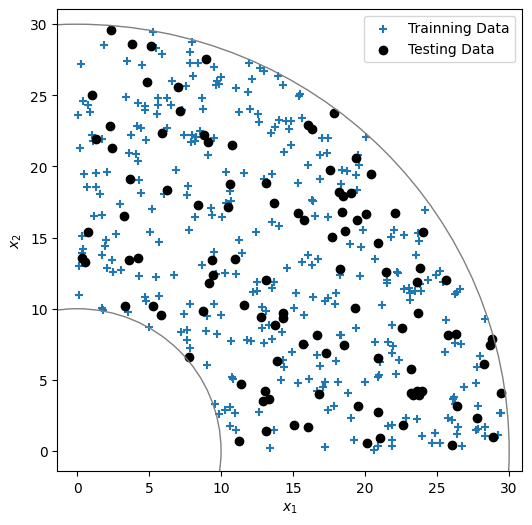

In [52]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
n = 1850
center = np.array([0, 0])
radius_in, radius_out = 10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:, 0] > 0) & (p[:, 1] > 0), :]
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :]
x1, x2 = p[:, 0], p[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size=0.25)
theta2 = np.arccos((x_train**2+y_train**2-l1**2-l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train)-np.arctan(l2 *
                                              np.sin(theta2)/(l1+l2*np.cos(theta2)))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# plt.savefig(img_dir + "datahigh_uniform.pdf", format='pdf')

Root Mean square error is 0.0274


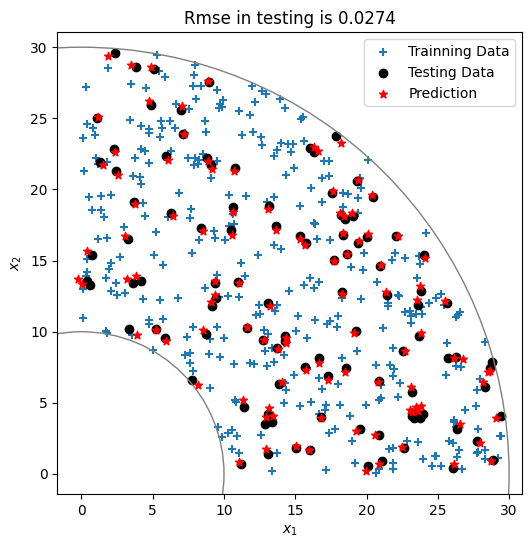

In [53]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+', label='Trainning Data')
ax.scatter(x_test, y_test, color='k', marker='o', label='Testing Data')
ax.add_artist(plt.Circle(center, radius_out, fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in, fill=False, color='0.5'))
InputX = np.c_[x_train, y_train]  # inputs: N x 2
OutputY = np.c_[theta1, theta2]  # output: N x 2
hidden_layers = (80, )  # 隱藏層層數
solver = 'lbfgs'  # the best for robot data # solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                       activation='logistic',  tol=1e-6, random_state=0)  # default activation = ’relu’
mlp_reg.fit(InputX, OutputY)  # Training ...
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = mlp_reg.predict(InputX_test)  # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat_test[:, 0], OutputY_hat_test[:, 1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color='r', marker='*',  label='Prediction')
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
rmse = np.sqrt(mean_squared_error(OutputY_test, OutputY_hat_test))
print('Root Mean square error is {:.4f}'.format(rmse))

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Rmse in testing is {:.4f}'.format(rmse))
plt.savefig(img_dir + "datahigh_uniform80.pdf", format='pdf')